# SVM Regression

### Complexity: O(n.m.m.m)

n = samples

m = features

In [1]:
import pandas as pd

seed = 's1'

# Double Pole
base = '../../../../datalake/data_baseline/data/xdpole/initialconditions'
n_features = 6

ic = pd.read_csv(f"{base}/{seed}_run.csv")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features = ic.columns[[i for i in range(n_features)]]
target = 'performance'
X, y = ic[features], ic[target]

start = 1000 * 10
X, y = X[start:], y[start:]
X = PolynomialFeatures(2).fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from utils import fit_cv

grid = {
    'kernel': ['linear', 'polynomial', 'rbf', 'sigmoid']
}
reg = GridSearchCV(svm.SVR(), grid)

params = fit_cv(reg, (X_train, y_train), 'svm')
print(params)

{'kernel': 'sigmoid'}


In [4]:
from critic import evolution

def model(X=[], y=[]):
    m = svm.SVR(**params)
    if len(X) + len(y) > 0:
        m.fit(X,y)
    return m

s, p, t = evolution(X, y, model)
print(t)

2.1946419550000087


<Axes: >

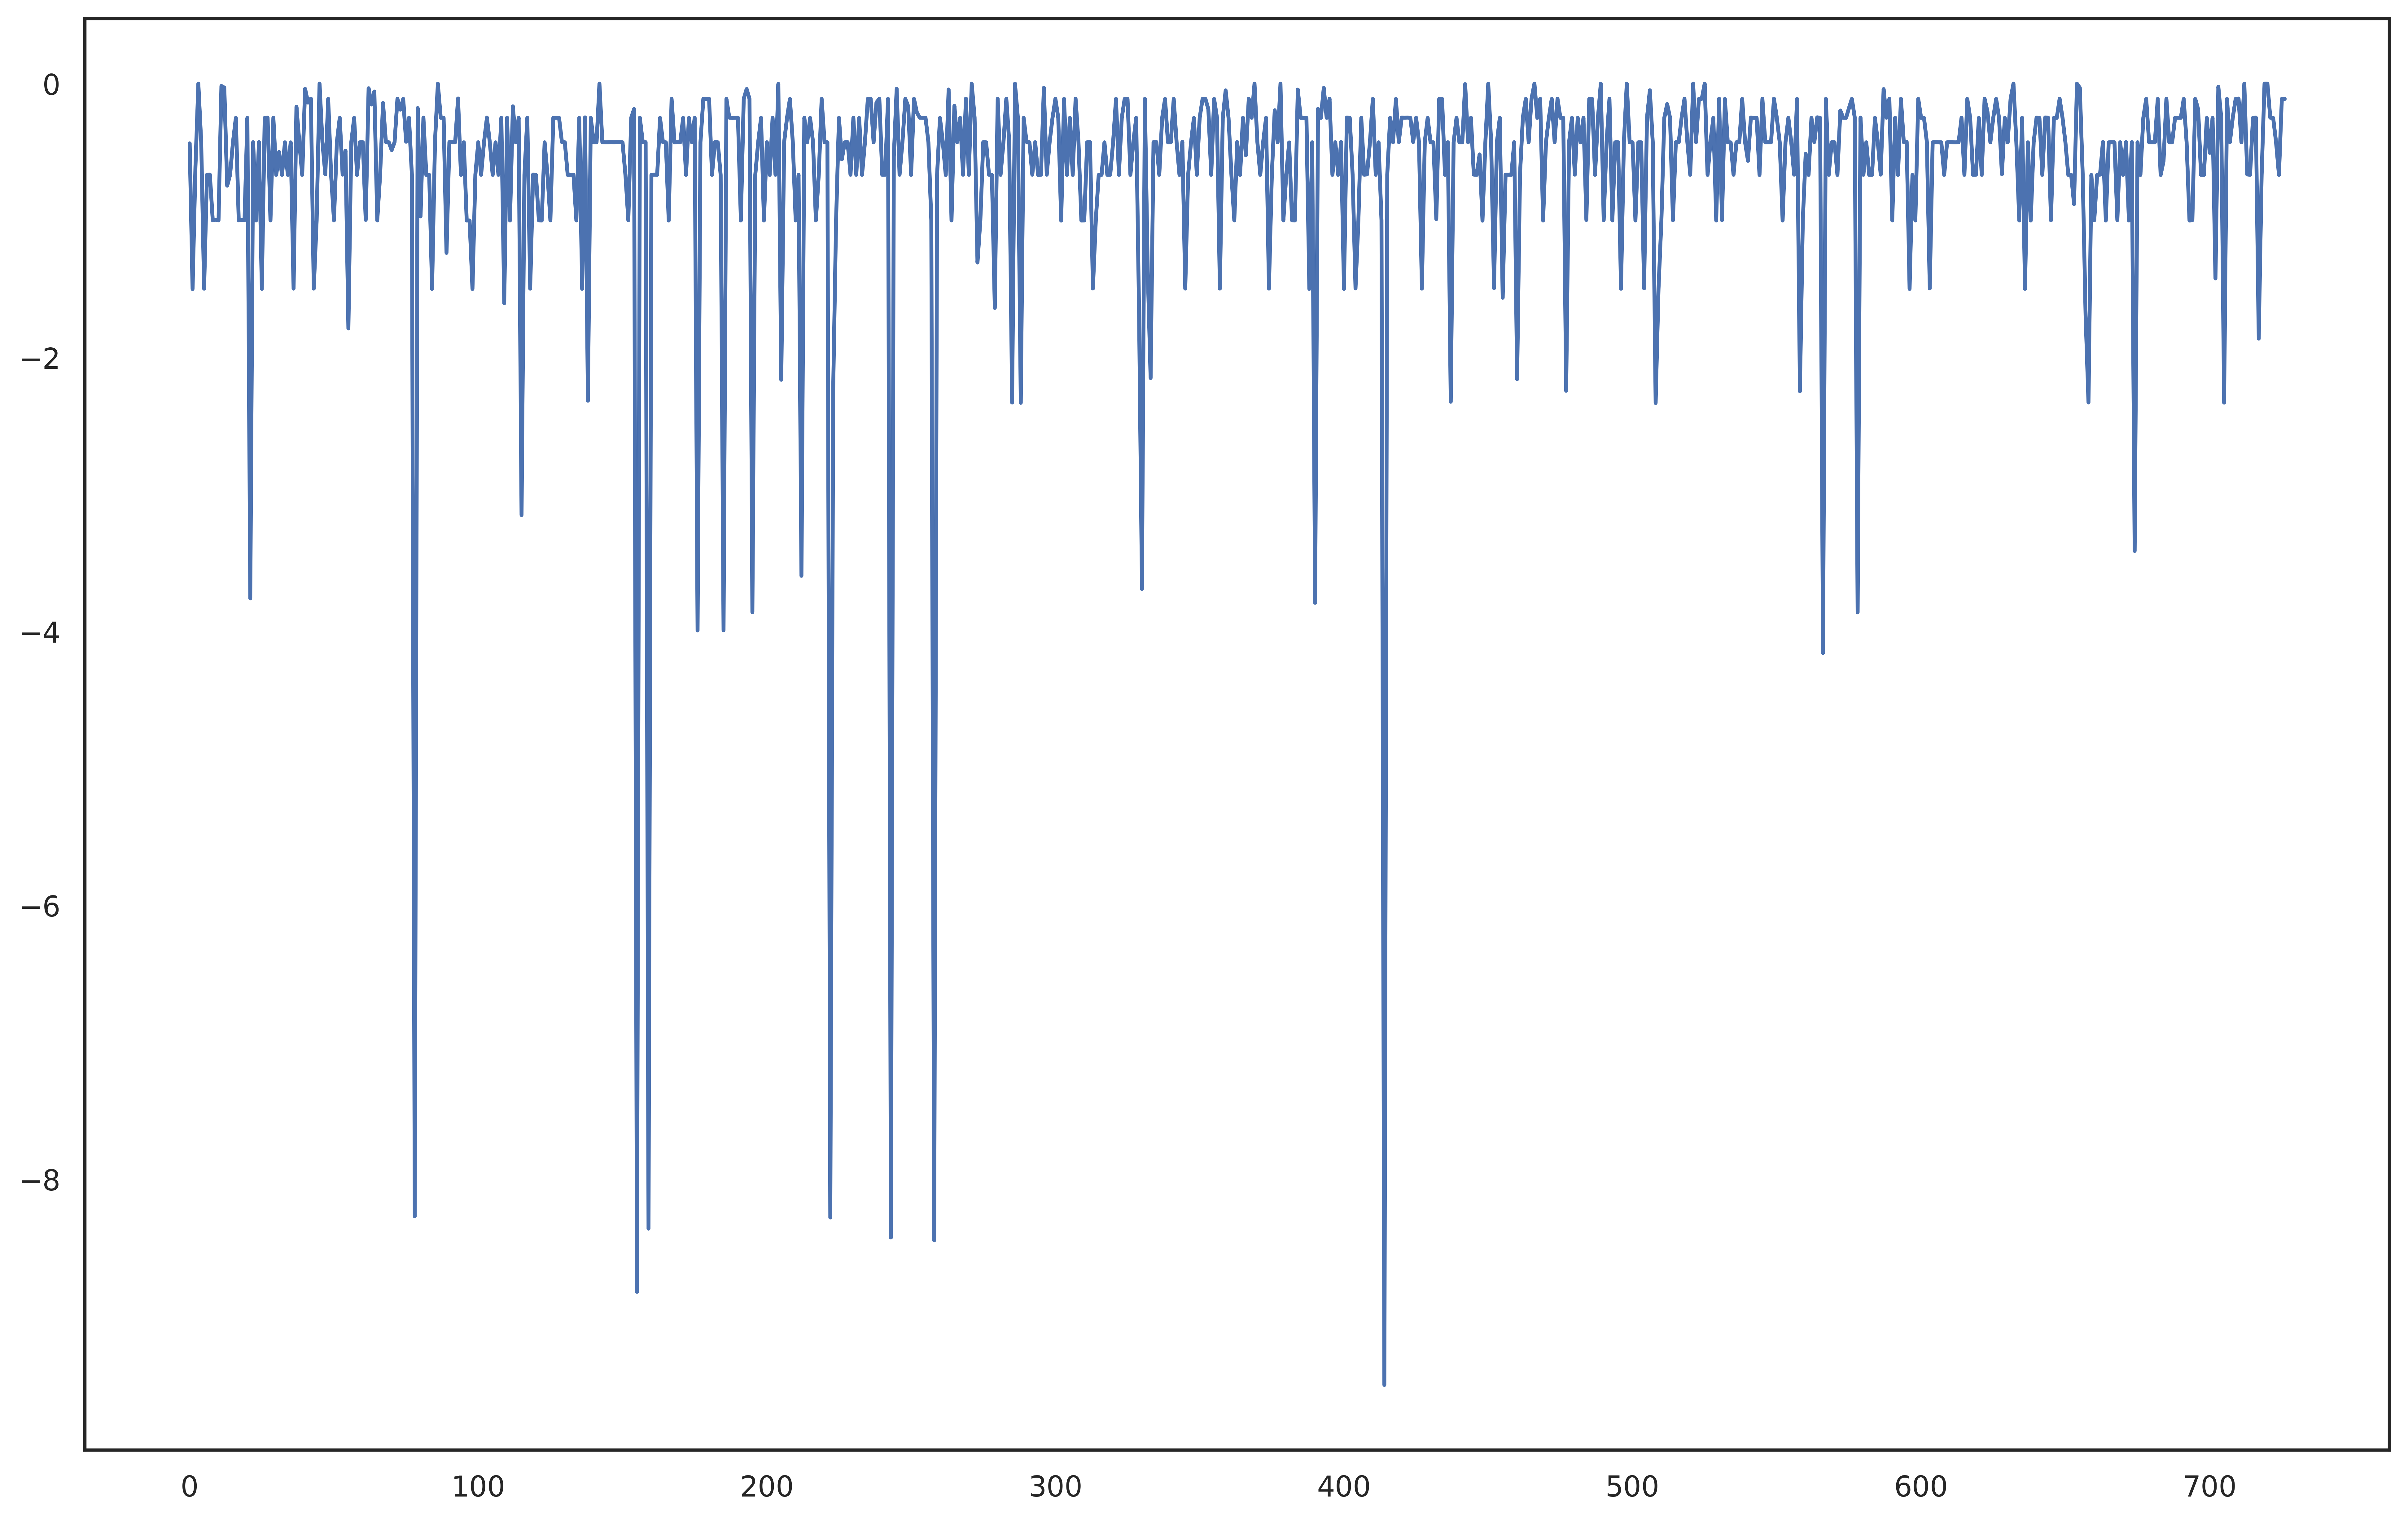

In [5]:
import seaborn as sns
from utils import graph_defaults
graph_defaults()

sns.lineplot(s)

<Axes: ylabel='Count'>

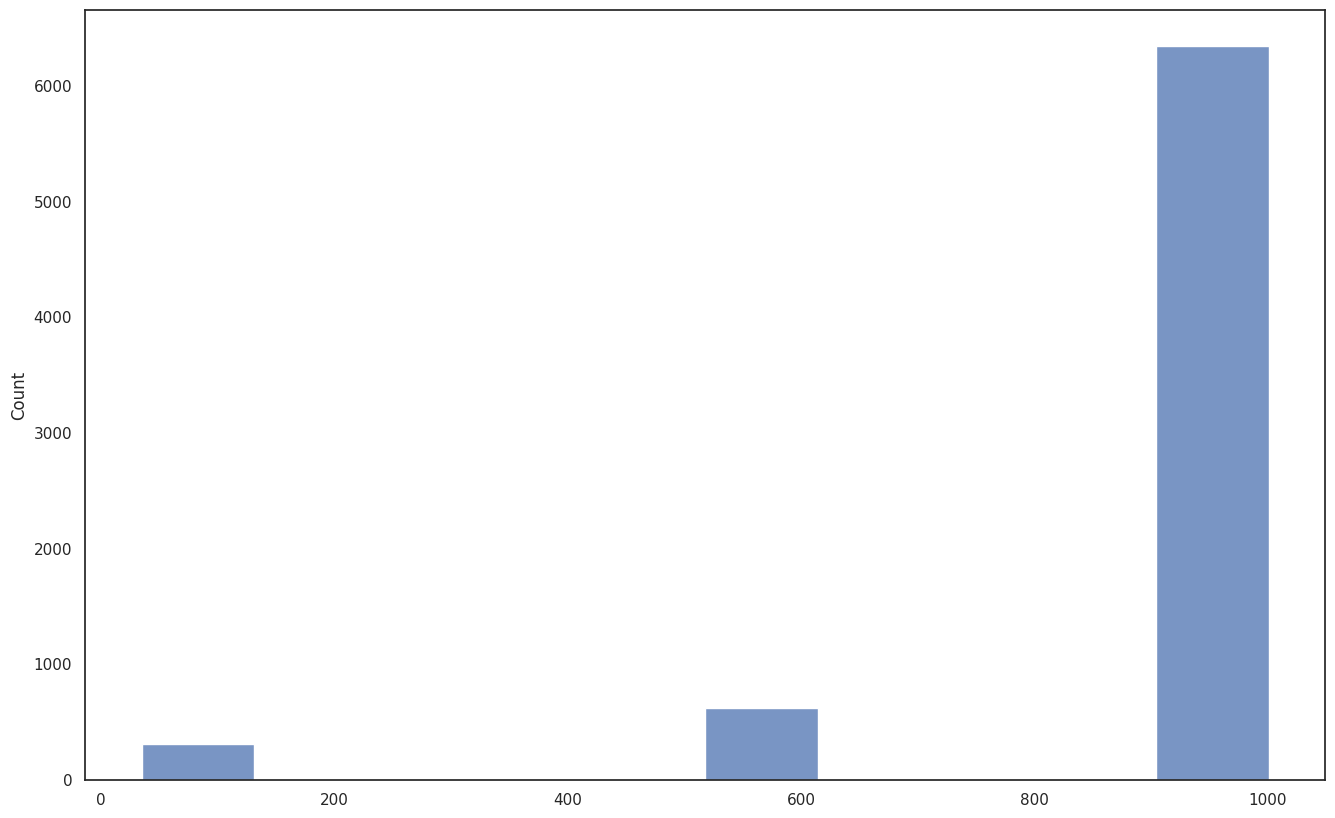

In [6]:
_p = [yp for gen in p for yp in gen]

sns.histplot(_p, bins=10)

In [7]:
yt = [y[i] for i in range(start+1, len(y), 2)]

e = [_p[i]/yt[i] for i in range(len(_p))]
e_df = pd.DataFrame(e)
e_df.describe()

,0
count,7270.000000
mean,9.987458
std,14.706413
min,0.035437
25%,0.999825
50%,1.000000
75%,16.383320
max,83.322699


<Axes: ylabel='pos'>

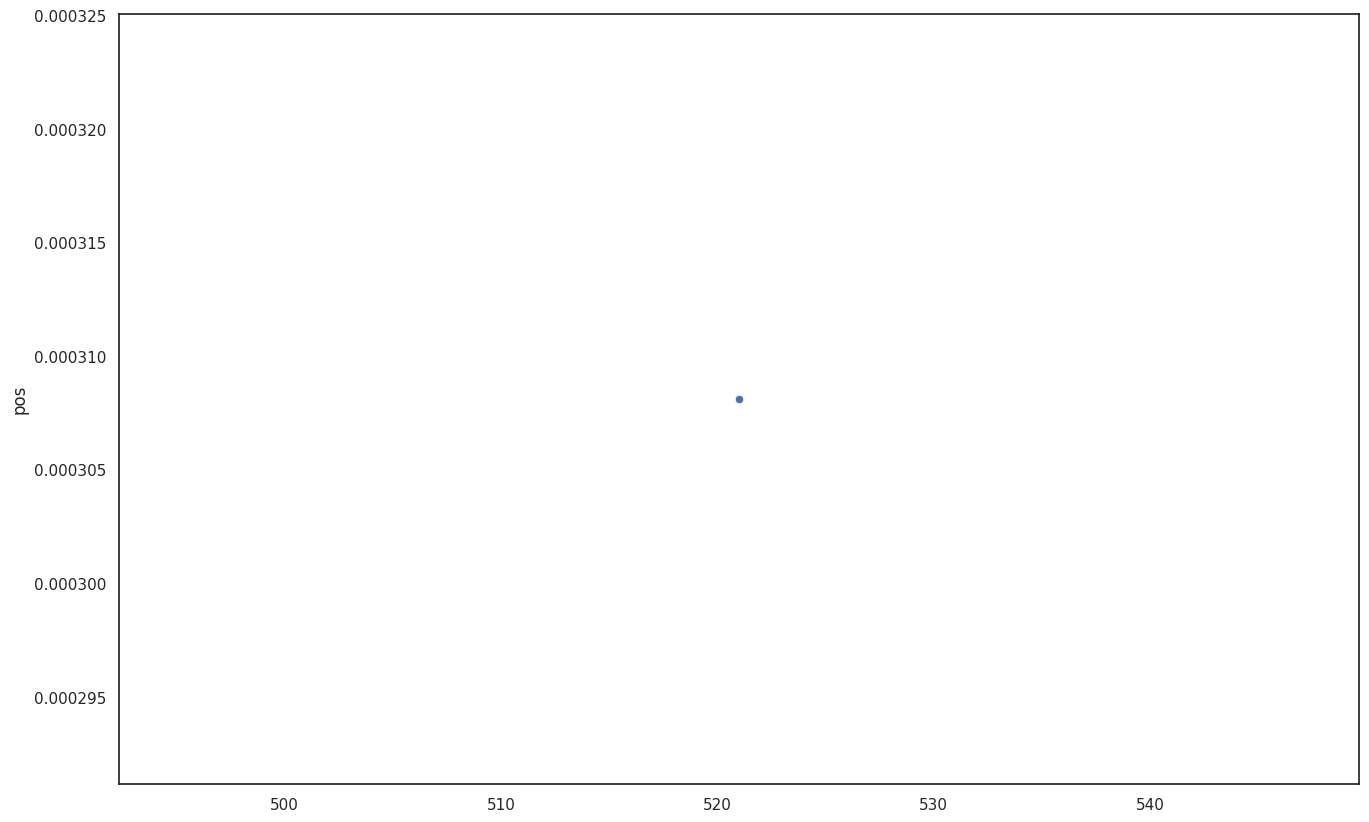

In [8]:
s_df = pd.DataFrame(s)
s_df.columns = ['raw']

s_df['pos'] = s_df.query('raw > 0').raw
s_df['neg'] = s_df.query('raw < 0').raw

sns.scatterplot(s_df['pos'])